# Exercise 1

Part 1: (*a*, *a*) &rarr; (*a*, -*a*) &rarr; (-*a*, -*a*) &rarr; (-*a*, *a*) &rarr; (*a*, *a*)  
Part 2: (1 - *a*, *a* - 1) &rarr; (-*a*/4, *a* - 1) &rarr; (-*a*/4, *a*/2) &rarr; (1 - *a*, *a*/2) &rarr; (1 - *a*, *a* - 1)  
Part 3: (*a*/4, *a* - 1) &rarr; (*a* - 1, *a*/2), then (*a* - 1, *a* - 1) &rarr; (*a*/4, *a*/2)  
Part 4: (*a* - 1, -*a*/4) &rarr; (*a* - 1, -*a*/2) &rarr; (1 - *a*, -*a*/2) &rarr; (1 - *a*, -*a*/4)  

To plot the points show above, I will store the x-components and y-components in seperate arrays per part. This is since the method *matplotlib.pyplot.plot(array1, array2)* takes an array of x-components and an array of y-components as parameters. For Part 3, since not all the points are connected, I will split the part into two sections, 3a and 3b, so that each can be plotted separately.

Points before transformation: 
[(4, 4), (4, -4), (-4, -4), (-4, 4), (4, 4)]
[(-3, 3), (-1.0, 3), (-1.0, 2.0), (-3, 2.0), (-3, 3)]
[(1.0, 3), (3, 2.0)]
[(3, 3), (1.0, 2.0)]
[(3, -1.0), (3, -2.0), (-3, -2.0), (-3, -1.0)]
---
Points after transformation: 
[(5.333333333333333, 0.0), (2.666666666666667, -2.6666666666666665), (-5.333333333333333, 0.0), (-2.666666666666667, 2.6666666666666665), (5.333333333333333, 0.0)]
[(-2.0, 2.0), (0.0, 1.3333333333333333), (-0.33333333333333337, 1.0), (-2.3333333333333335, 1.6666666666666665), (-2.0, 2.0)]
[(2.0, 0.6666666666666667), (3.6666666666666665, -0.3333333333333333)]
[(4.0, 5.551115123125783e-17), (1.6666666666666665, 0.3333333333333333)]
[(2.6666666666666665, -1.3333333333333333), (2.3333333333333335, -1.6666666666666665), (-3.6666666666666665, 0.3333333333333333), (-3.3333333333333335, 0.6666666666666666)]
---
Plotted points before and after transformation: 


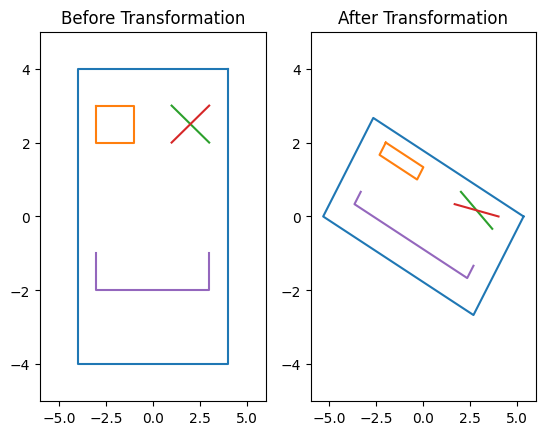

In [1]:
import numpy as np
import matplotlib.pyplot as plt

a = 4
b = 3

parts = np.asarray([
    [[a, a, -a, -a, a], [a, -a, -a, a, a]], #part 1 (x's and y's)
    [[1 - a, -a / 4, -a / 4, 1 - a, 1- a], [a - 1, a - 1, a / 2, a / 2, a - 1]], #part 2 (x's and y's)
    [[a / 4, a - 1], [a - 1, a / 2]], #part 3a (x's and y's)
    [[a - 1, a / 4], [a - 1, a / 2]], #part 3b (x's and y's)
    [[a - 1, a - 1, 1 - a, 1 - a], [-a / 4, -a / 2, -a / 2, -a / 4]] #part 4 (x's and y's)
], dtype=object)

#plot each part on the first subplot
for x in parts:
    plt.subplot(1, 2, 1)
    plt.plot(x[0], x[1])
plt.xlim([-a - 2, a + 2]) #set the range of the x axis
plt.ylim([-a - 1, a + 1]) #set the range of the y axis
plt.title("Before Transformation")

#transformation matrix
matrix = np.asmatrix([
    [1, 1 / b],
    [-1 / b, 1 / b]
])

#array to contain parts after points are transformed
newParts = np.empty(np.shape(parts), dtype=object)

partCount = 0
for part in parts:
    points = list(zip(part[0], part[1])) #combine x and y components to create a list of points
    newPoints = []
    #complete the matrix multiplication for each point
    for point in points:
        point = np.asarray(point)
        newPoint = np.asarray(list(np.dot(matrix, point)))
        newPoints.append(newPoint[0][0])
    xComponents = list(zip(*newPoints))[0]
    yComponents = list(zip(*newPoints))[1]

    #store the transformed points (split into x and y components) into new array
    newParts[partCount, 0] = xComponents
    newParts[partCount, 1] = yComponents

    partCount += 1

print("Points before transformation: ")
#list all the points before the matrix transformation
for i in parts:
    print(list(zip(i[0], i[1])))
print("---")

print("Points after transformation: ")
#list all the points after the matrix transformation
for j in newParts:
    print(list(zip(j[0], j[1])))
print("---")

print("Plotted points before and after transformation: ")
#plot each translated part on the second subplot
for y in newParts:
    plt.subplot(1, 2, 2)
    plt.plot(y[0], y[1])
plt.xlim([-a - 2, a + 2]) #set the range of the x axis
plt.ylim([-a - 1, a + 1]) #set the range of the y axis
plt.title("After Transformation")

plt.show()

# Exercise 2

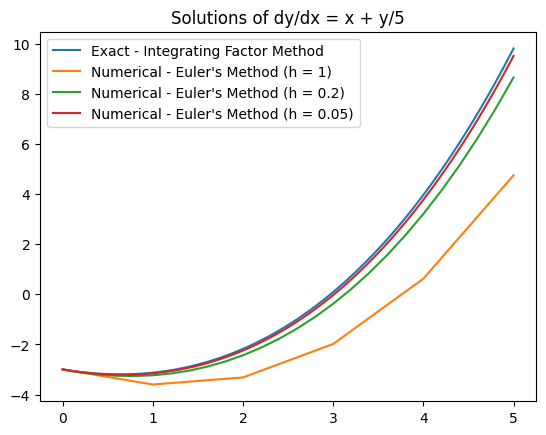

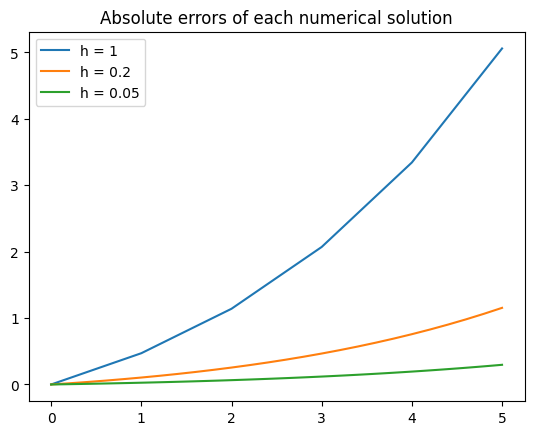

In [45]:
import math
import matplotlib.pyplot as plt

interval = [0, 5] #interval of x values
x0 = 0 #x value of initial condition
y0 = -3 #y value of initial condition

def eulers(stepSize): #function to implement Euler's method
    x = x0
    y = y0
    xComponents = [x]
    yComponents = [y]
    #for each x value in interval
    while x < interval[1]:
        y = y + stepSize*(x + y/5) #newY = oldY + h*f(oldX, oldY) - Euler's method
        yComponents.append(y)
        x += stepSize #increment x by step size
        x = float(format(x, ".2f")) #round x to two decimal points
        xComponents.append(x)

    plt.figure(0)
    plt.plot(xComponents, yComponents, label="Numerical - Euler's Method (h = " + str(stepSize) + ")") #plot points for Euler's method
    return xComponents, yComponents

def integratingFactor(): #function to implement Integrating Factor method
    x = 0
    y = 22*pow(math.e, x/5) - 5*x - 25
    xComponents = [x]
    yComponents = [y]
    #for each x value in interval
    while x < interval[1]:
        x += 0.05 #increment x by a stepsize of 0.05
        x = float(format(x, ".2f")) #round x to two decimal points
        xComponents.append(x)
        y = 22*pow(math.e, x/5) - 5*x - 25 #substitute x into the equation 'y = 22e^(x/5) - 5x - 25' - The derivation of this equation is shown below
        yComponents.append(y)
    
    plt.figure(0)
    plt.plot(xComponents, yComponents, label="Exact - Integrating Factor Method") #plot the points for Integrating Factor method
    return xComponents, yComponents
    

exactX, exactY = integratingFactor() #call integrating factor method to find exact solution, unpacking x and y components for error calculation

numericalX1, numericalY1 = eulers(1) #call Euler's method with stepsize 1, unpacking x and y components for error calculation
errorX1 = []
errorY1 = []
#calculates the error for each value in the x components of the euler's method
for i in numericalX1:
    for j in exactX:
        if i == j:
            errorX1.append(i)
            errorY1.append(abs(exactY[exactX.index(j)] - numericalY1[numericalX1.index(i)]))
plt.figure(1)
plt.plot(errorX1, errorY1, label="h = 1")

numericalX02, numericalY02 = eulers(0.2) #call Euler's method with stepsize 0.2, unpacking x and y components for error calculation
errorX02 = []
errorY02 = []
#calculates the error for each value in the x components of the euler's method
for i in numericalX02:
    for j in exactX:
        if i == j:
            errorX02.append(i)
            errorY02.append(abs(exactY[exactX.index(j)] - numericalY02[numericalX02.index(i)]))
plt.figure(1)
plt.plot(errorX02, errorY02, label="h = 0.2")

numericalX005, numericalY005 = eulers(0.05) #call Euler's method with stepsize 0.05, unpacking x and y components for error calculation
errorX005 = []
errorY005 = []
#calculates the error for each value in the x components of the euler's method
for i in numericalX005:
    for j in exactX:
        if i == j:
            errorX005.append(i)
            errorY005.append(abs(exactY[exactX.index(j)] - numericalY005[numericalX005.index(i)])) #absolute value of (exact solution - approximate solution)
plt.figure(1)
plt.plot(errorX005, errorY005, label="h = 0.05")

plt.figure(0)
plt.legend()
plt.title("Solutions of dy/dx = x + y/5")

plt.figure(1)
plt.legend()
plt.title("Absolute errors of each numerical solution")

plt.show()

#### Comparison of Results

The plotted lines on the first figure above show the numerical solutions, at different step sizes, and the exact solution to the differential equation. By comparing different aspects of the graph, we can analyse the accuracy of the approximating Euler's method against the exact Integrating Factor method.

It is observable from the graph that by using a smaller stepsize (h) in the Euler method, a line closer to the one of the exact solution will be plotted. This shows that a smaller value of h will lead to a more accurate solution of the differential equation. Lets say we were to take tangents of both the exact solution and the numerical solution (stepsize of 0.05), at an arbitrary x value. By doing so, we would see that the values of the tangents are significantly closer than if we to compare the exact solution's tangent to the numerical solution that has a stepsize of 1. This is since a smaller stepsize in Euler's method means that the tangent, taken at each point, is closer to the real value than if a larger stepsize was used. If a smaller value of h is used, it results in a significantly more accurate solution, evident with the lines above being increasingly closer to that of the exact solution for each smaller value of h.

In addition, shown in all four lines, there is a slight dip in the line until a certain x value where the line increase in an exponential-like way. For the less accurate numerical solutions (those using larger stepsizes), the dip is more significant and takes longer for the increase to occur. This is another inaccuracy against the exact solution, shown when larger values of h are used in Euler's method for the numerical solutions.

Although using a smaller value of h for the stepsize will result in a more accurate solution to the differential equation, it will also mean that more values are calculated, increasing the time to compute the solutions. This shows that there is a tradeoff between accuracy and time taken to calculate.

#### Derivation of Equation

The following are the steps of how I derived the equation used in the Integrating Factor method above.

*Differential equation:*

$\qquad \frac{dy}{dx} = x + \frac{y}{5}, \ y(0) = -3 $

*Steps to derive:*

1. Rearrange the equation

$\qquad\qquad \frac{dy}{dx} - \frac{1}{5}y = x $

2. Find the Integrating Factor

$\qquad\qquad e^{\int -\frac{1}{5}x \ dx} $  
$\qquad\qquad = e^{-\frac{1}{5}x} $

3. Multiply equation by Integrating Factor

$\qquad\qquad \frac{dy}{dx}e^{-\frac{1}{5}x} - \frac{1}{5}e^{-\frac{1}{5}x}y = xe^{-\frac{1}{5}x} $  
$\qquad\qquad = \frac{d}{dx}(ye^{-\frac{1}{5}x}) = xe^{-\frac{1}{5}x} $

4. Integrate both sides of the equation

$\qquad\qquad ye^{-\frac{1}{5}x} = \int xe^{-\frac{1}{5}x} \ dx $

$\qquad\qquad$ Using integration by parts for RHS:  
  
$\qquad\qquad\qquad u = x, \ so \ \frac{du}{dx} = 1 $  
$\qquad\qquad\qquad \frac{dv}{dx} = e^{-\frac{1}{5}x}, \ so \ v = -5e^{-\frac{1}{5}x} $  

$\qquad\qquad\qquad I = -5xe^{-\frac{1}{5}x} - \int -5e^{-\frac{1}{5}x} \ dx $  
$\qquad\qquad\qquad = -5xe^{-\frac{1}{5}x} - 25e^{-\frac{1}{5}x} + c $  

$\qquad\qquad$ So, $ ye^{-\frac{1}{5}x} = -5xe^{-\frac{1}{5}x} - 25e^{-\frac{1}{5}x} + c $

5. Find c using the initial condition, y(0) = -3

$\qquad\qquad -3e^{-\frac{1}{5}\times0} = -5 \times 0 \times e^{-\frac{1}{5}\times0} - 25e^{-\frac{1}{5}\times0} + c $  
$\qquad\qquad -3 = 0 -25 + c $  
$\qquad\qquad c = 22 $  

$\qquad\qquad$ So, $ ye^{-\frac{1}{5}x} = -5xe^{-\frac{1}{5}x} - 25e^{-\frac{1}{5}x} + 22 $

6. Make y the subject

$\qquad\qquad y = e^{\frac{1}{5}x}(-5xe^{-\frac{1}{5}x} - 25e^{-\frac{1}{5}x} + 22) $  
$\qquad\qquad y = -5x - 25 + 22e^{\frac{1}{5}x} $

$\qquad\qquad$ So, $ y = 22e^{\frac{1}{5}x} -5x - 25 $

*Derived equation:*

$\qquad y = 22e^{\frac{1}{5}x} -5x - 25 $